In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [8]:
sales = pd.read_csv('AusApparalSales4thQrt2020.csv')
sales.head(10)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


DATA WRANGLING

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [17]:
sales.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [19]:
sales.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [22]:
##subsetting only the numeric data:
sales_data = sales[['Unit', 'Sales']]
sales_data.head()

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500


In [25]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
normalize=MinMaxScaler()

In [31]:
normalized_data=normalize.fit_transform(sales_data)
print(normalized_data)
print(normalized_data.shape)

[[0.0952381  0.0952381 ]
 [0.0952381  0.0952381 ]
 [0.03174603 0.03174603]
 ...
 [0.20634921 0.20634921]
 [0.14285714 0.14285714]
 [0.17460317 0.17460317]]
(7560, 2)


In [34]:
sales_nw=sales.copy()

In [37]:
sales_nw['Unit']=(sales_nw['Unit']-sales_nw['Unit'].min())/(sales_nw['Unit'].max()-sales_nw['Unit'].min())
sales_nw['Sales']=(sales_nw['Sales']-sales_nw['Sales'].min())/(sales_nw['Sales'].max()-sales_nw['Sales'].min())

In [40]:
sales_nw.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [43]:
sales_nw.groupby('Time').sum('Sales')

,Unit,Sales
Time,,
Afternoon,643.857143,643.857143
Evening,631.666667,631.666667
Morning,645.126984,645.126984


DATA ANALYSIS

In [48]:
print(sales_nw.describe())
print()
print("Mode of Units and Sales", sales_data.mode())

              Unit        Sales
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%       0.380952     0.380952
max       1.000000     1.000000

Mode of Units and Sales    Unit  Sales
0     9  22500


In [51]:
highest_sales_group=sales_nw.groupby('Group').sum('Sales').idxmax()
lowest_sales_group=sales_nw.groupby('Group').sum('Sales').idxmin()
print("Highest Selling Group:", highest_sales_group)
print("Lowest Selling Group:", lowest_sales_group)

Highest Selling Group: Unit      Men
Sales     Men
dtype: object
Lowest Selling Group: Unit      Seniors
Sales     Seniors
dtype: object


In [59]:
sales_nw['Date'] = pd.to_datetime(sales_nw['Date'])
print(sales_nw.head(3))
print(sales_nw.Date.dtypes)


        Date      Time State   Group      Unit     Sales
0 2020-10-01   Morning    WA    Kids  0.095238  0.095238
1 2020-10-01   Morning    WA     Men  0.095238  0.095238
2 2020-10-01   Morning    WA   Women  0.031746  0.031746
datetime64[ns]


In [63]:
df_unit_sales= sales_nw.groupby(by = 'Date', axis= 'index').sum()
df_unit_sales.head()

C:\Users\drish\AppData\Local\Temp\ipykernel_12120\4076368051.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_unit_sales= sales_nw.groupby(by = 'Date', axis= 'index').sum()


,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,20.952381,20.952381
2020-10-02,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,20.920635,20.920635
2020-10-03,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,22.031746,22.031746
2020-10-04,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,20.952381,20.952381
2020-10-05,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,21.857143,21.857143


In [66]:
df_oct= df_unit_sales.loc['2020-10-01': '2020-10-31']
print(df_oct)

                                                         Time  \
Date                                                            
2020-10-01   Morning Morning Morning Morning Afternoon Aft...   
2020-10-02   Morning Morning Morning Morning Afternoon Aft...   
2020-10-03   Morning Morning Morning Morning Afternoon Aft...   
2020-10-04   Morning Morning Morning Morning Afternoon Aft...   
2020-10-05   Morning Morning Morning Morning Afternoon Aft...   
2020-10-06   Morning Morning Morning Morning Afternoon Aft...   
2020-10-07   Morning Morning Morning Morning Afternoon Aft...   
2020-10-08   Morning Morning Morning Morning Afternoon Aft...   
2020-10-09   Morning Morning Morning Morning Afternoon Aft...   
2020-10-10   Morning Morning Morning Morning Afternoon Aft...   
2020-10-11   Morning Morning Morning Morning Afternoon Aft...   
2020-10-12   Morning Morning Morning Morning Afternoon Aft...   
2020-10-13   Morning Morning Morning Morning Afternoon Aft...   
2020-10-14   Morning Morn

In [69]:
df_nov= df_unit_sales.loc['2020-11-01': '2020-11-30']
print(df_nov)

                                                         Time  \
Date                                                            
2020-11-01   Morning Morning Morning Morning Afternoon Aft...   
2020-11-02   Morning Morning Morning Morning Afternoon Aft...   
2020-11-03   Morning Morning Morning Morning Afternoon Aft...   
2020-11-04   Morning Morning Morning Morning Afternoon Aft...   
2020-11-05   Morning Morning Morning Morning Afternoon Aft...   
2020-11-06   Morning Morning Morning Morning Afternoon Aft...   
2020-11-07   Morning Morning Morning Morning Afternoon Aft...   
2020-11-08   Morning Morning Morning Morning Afternoon Aft...   
2020-11-09   Morning Morning Morning Morning Afternoon Aft...   
2020-11-10   Morning Morning Morning Morning Afternoon Aft...   
2020-11-11   Morning Morning Morning Morning Afternoon Aft...   
2020-11-12   Morning Morning Morning Morning Afternoon Aft...   
2020-11-13   Morning Morning Morning Morning Afternoon Aft...   
2020-11-14   Morning Morn

In [72]:
df_dec= df_unit_sales.loc['2020-12-01': '2020-12-31']
print(df_dec)

                                                         Time  \
Date                                                            
2020-12-01   Morning Morning Morning Morning Afternoon Aft...   
2020-12-02   Morning Morning Morning Morning Afternoon Aft...   
2020-12-03   Morning Morning Morning Morning Afternoon Aft...   
2020-12-04   Morning Morning Morning Morning Afternoon Aft...   
2020-12-05   Morning Morning Morning Morning Afternoon Aft...   
2020-12-06   Morning Morning Morning Morning Afternoon Aft...   
2020-12-07   Morning Morning Morning Morning Afternoon Aft...   
2020-12-08   Morning Morning Morning Morning Afternoon Aft...   
2020-12-09   Morning Morning Morning Morning Afternoon Aft...   
2020-12-10   Morning Morning Morning Morning Afternoon Aft...   
2020-12-11   Morning Morning Morning Morning Afternoon Aft...   
2020-12-12   Morning Morning Morning Morning Afternoon Aft...   
2020-12-13   Morning Morning Morning Morning Afternoon Aft...   
2020-12-14   Morning Morn

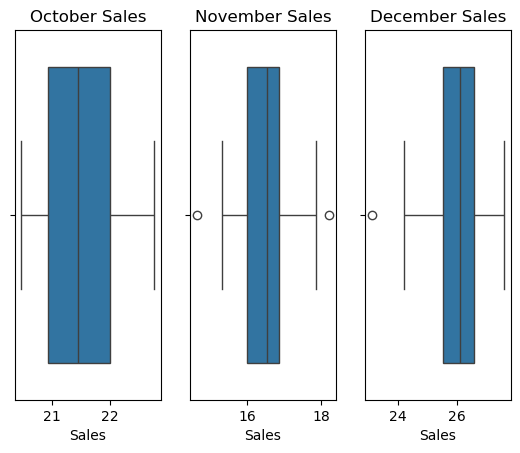

In [75]:
fig,axes =plt.subplots(1, 3)
boxplot_oct= sns.boxplot(x='Sales', data = df_oct, ax=axes[0])
boxplot_nov= sns.boxplot(x='Sales', data = df_nov, ax=axes[1])
boxplot_dec= sns.boxplot(x='Sales', data = df_dec, ax=axes[2])
boxplot_oct.set(title= "October Sales")
boxplot_nov.set(title= "November Sales")
boxplot_dec.set(title= "December Sales")
plt.show()
                         

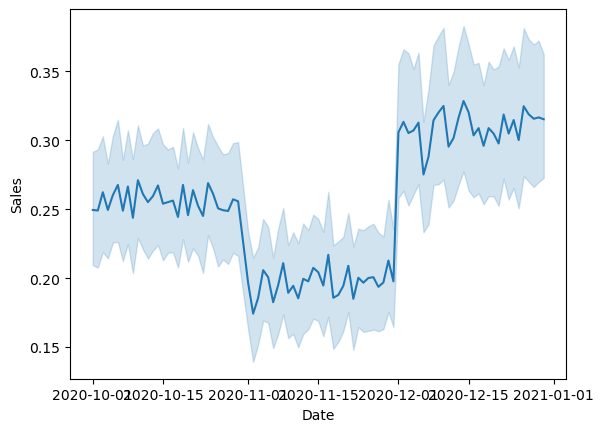

In [78]:
#how much does sales vary over time?
sns.lineplot(x='Date', y= 'Sales', data=sales_nw)
plt.show()

In [86]:
weekly_data= sales_nw.resample('W', on= 'Date')['Sales'].sum()

In [88]:
weekly_data

Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

In [93]:
quarterly_data= sales_nw.resample('QE', on= 'Date')['Sales'].sum()
quarterly_data

Date
2020-12-31    1920.650794
Freq: QE-DEC, Name: Sales, dtype: float64

In [98]:
monthly_data= sales_nw.resample('ME', on= 'Date')['Sales'].sum()
monthly_data

Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: ME, Name: Sales, dtype: float64

DATA VISUALIZATION

<Axes: xlabel='State', ylabel='Sales'>

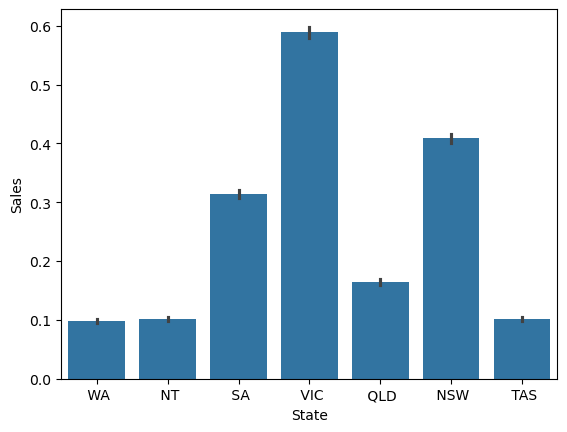

In [104]:
##state wise analysis:
sns.barplot(x=sales_nw['State'], y= sales_nw['Sales'], data= sales_nw)

<Axes: xlabel='Group', ylabel='Sales'>

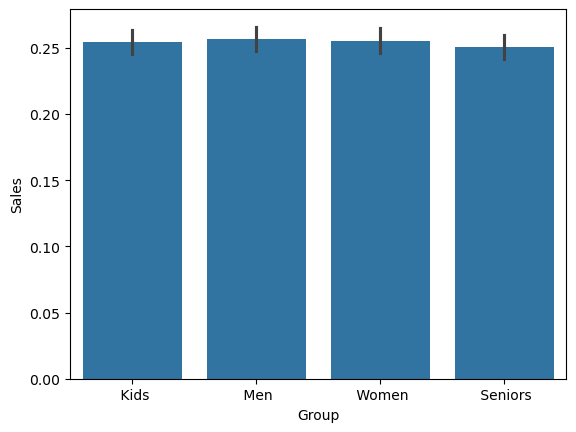

In [107]:
##group wise analysis:
sns.barplot(x=sales_nw['Group'], y= sales_nw['Sales'], data= sales_nw)

<Axes: xlabel='Time', ylabel='Sales'>

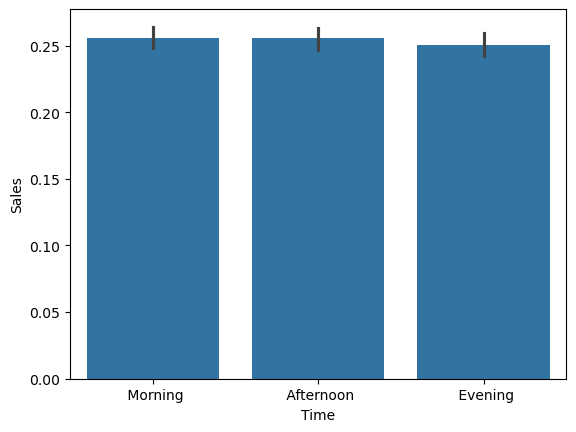

In [110]:
##Time of the day analysis
sns.barplot(x=sales_nw['Time'], y= sales_nw['Sales'], data= sales_nw)
